In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [5]:
tf.set_random_seed(1)
np.random.seed(1)

In [6]:
x = np.linspace(-1, 1, 100)[:, np.newaxis]
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise

In [7]:
def save():
    tf_x = tf.placeholder(tf.float32, x.shape)
    tf_y = tf.placeholder(tf.float32, y.shape)
    l = tf.layers.dense(tf_x, 10, tf.nn.relu)
    o = tf.layers.dense(l, 1)
    loss = tf.losses.mean_squared_error(tf_y, o)
    train_op = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        for step in range(100):
            sess.run(train_op, {tf_x: x, tf_y: y})
        saver.save(sess, "./params", write_meta_graph=False)
        
        pred, l = sess.run([o, loss], {tf_x: x, tf_y: y})
        plt.scatter(x, y)
        plt.plot(x, pred, "r-", lw=5)
        plt.text(-1, 1.2, "Save Loss=%.4f" % l)
        plt.show()

In [14]:
def reload():
    tf_x = tf.placeholder(tf.float32, x.shape)
    tf_y = tf.placeholder(tf.float32, y.shape)
    l_ = tf.layers.dense(tf_x, 10, tf.nn.relu)
    o_ = tf.layers.dense(l_, 1)
    loss_ = tf.losses.mean_squared_error(tf_y, o_)
    with tf.Session() as sess:
        saver = tf.train.Saver()
        saver.restore(sess, "./params")
        
        pred, l = sess.run([o_, loss_], {tf_x: x, tf_y: y})
        plt.scatter(x, y)
        plt.plot(x, pred, "r-", lw=5)
        plt.text(-1, 1.2, "Reload Loss=%.4f" % l, fontdict={"size": 15, "color": "red"})
        plt.show()

In [9]:
%matplotlib inline

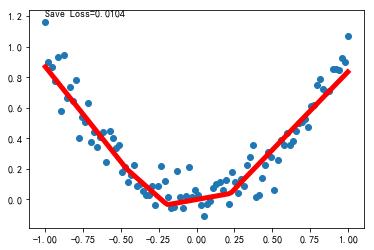

In [10]:
save()

In [15]:
reload() # 在jupyter下会报错，文件路径下操作正常

This is reload


NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key dense_2/bias not found in checkpoint
	 [[Node: save_2/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_2/Const_0_0, save_2/RestoreV2/tensor_names, save_2/RestoreV2/shape_and_slices)]]

Caused by op 'save_2/RestoreV2', defined at:
  File "C:\Anaconda3\lib\runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 596, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 827, in start
    self._run_callback(callback)
  File "C:\Anaconda3\lib\site-packages\tornado\ioloop.py", line 600, in _run_callback
    ret = callback()
  File "C:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 258, in enter_eventloop
    self.eventloop(self)
  File "C:\Anaconda3\lib\site-packages\ipykernel\eventloops.py", line 164, in loop_tk
    kernel.timer.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\eventloops.py", line 161, in start
    self.app.mainloop()
  File "C:\Anaconda3\lib\tkinter\__init__.py", line 1131, in mainloop
    self.tk.mainloop(n)
  File "C:\Anaconda3\lib\tkinter\__init__.py", line 1549, in __call__
    return self.func(*args)
  File "C:\Anaconda3\lib\tkinter\__init__.py", line 596, in callit
    func(*args)
  File "C:\Anaconda3\lib\site-packages\ipykernel\eventloops.py", line 156, in on_timer
    self.func()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 291, in do_one_iteration
    stream.flush(zmq.POLLIN, 1)
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 352, in flush
    self._handle_recv()
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2831, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-f3ce917be780>", line 1, in <module>
    reload() # 在jupyter下会报错，文件路径下操作正常
  File "<ipython-input-14-64f19b680ba1>", line 12, in reload
    saver = tf.train.Saver()  # define a saver for saving and restoring
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1281, in __init__
    self.build()
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1293, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1330, in _build
    build_save=build_save, build_restore=build_restore)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 778, in _build_internal
    restore_sequentially, reshape)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 397, in _AddRestoreOps
    restore_sequentially)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 829, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1462, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 454, in new_func
    return func(*args, **kwargs)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3155, in create_op
    op_def=op_def)
  File "C:\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1717, in __init__
    self._traceback = tf_stack.extract_stack()

NotFoundError (see above for traceback): Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key dense_2/bias not found in checkpoint
	 [[Node: save_2/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, ..., DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT, DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_2/Const_0_0, save_2/RestoreV2/tensor_names, save_2/RestoreV2/shape_and_slices)]]
